In [8]:
# data analysis
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## 1. Acquire data

In [99]:
train_df = pd.read_csv('data/train.csv', index_col='PassengerId')
test_df = pd.read_csv('data/test.csv', index_col='PassengerId')

In [86]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## 2. Analyze data

In [3]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64

In [4]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [30]:
train_df[['Survived', 'Pclass']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)
# => retain Pclass in our model

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [69]:
train_df[['Survived', 'SibSp']].groupby('SibSp').mean().sort_values(by='Survived', ascending=False)
# => retain SibSp in our model

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [70]:
train_df[['Survived', 'Parch']].groupby('Parch').mean().sort_values('Survived', ascending=False)
# => retain Parch in our model

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [71]:
train_df[['Survived', 'Sex']].groupby('Sex').mean().sort_values(by='Survived', ascending=False)
# => retain Sex in our model

,Survived
Sex,
female,0.742038
male,0.188908


## 3. Visualize data

### Correlating numerical features

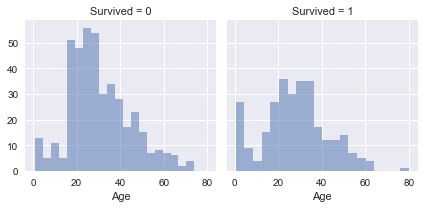

In [54]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', alpha=0.5, bins=20)
# => retain Age in our model

### Correlating numerical and ordinal features

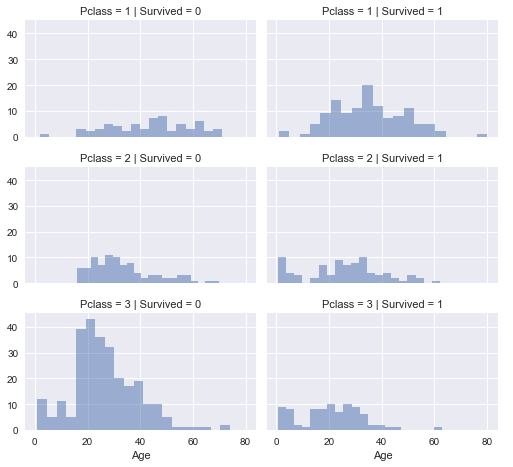

In [58]:
g = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
g.map(plt.hist, 'Age', alpha=0.5, bins=20)
g.add_legend()
# => retain Pclass in our model

### Correlating categorical features

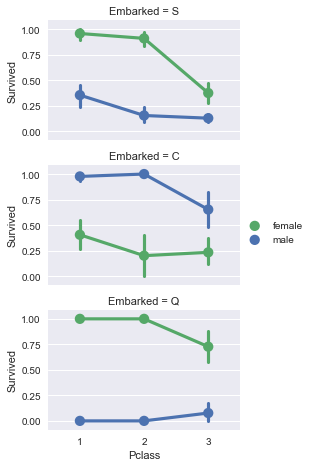

In [66]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
# => retain Sex and Embarked in our model

### Correlating categorical and numerical features

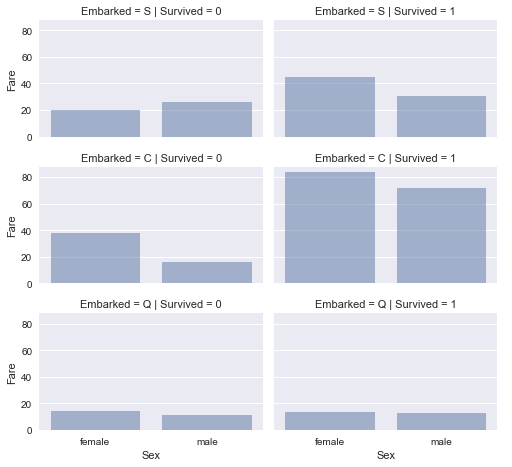

In [68]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()
# => retain Fare in our model

## 4. Wrangle data

In [100]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
all_df = [train_df, test_df]

print train_df.shape
print test_df.shape

(891, 9)
(418, 8)


### Creating new feature extracting from existing

In [102]:
for df in all_df: 
    df['Title'] = df.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [108]:
pd.crosstab([train_df.Survived, train_df.Sex], train_df.Title)

Title            Capt  Col  Countess  Don  Dr  Jonkheer  Lady  Major  Master  \
Survived Sex                                                                   
0        female     0    0         0    0   0         0     0      0       0   
         male       1    1         0    1   4         1     0      1      17   
1        female     0    0         1    0   1         0     1      0       0   
         male       0    1         0    0   2         0     0      1      23   

Title            Miss  Mlle  Mme   Mr  Mrs  Ms  Rev  Sir  
Survived Sex                                              
0        female    55     0    0    0   26   0    0    0  
         male       0     0    0  436    0   0    6    0  
1        female   127     2    1    0   99   1    0    0  
         male       0     0    0   81    0   0    0    1

In [109]:
pd.crosstab(test_df.Sex, test_df.Title)

Title,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2
